#### Задача Коши для обыкновенного дифференциального уравнения 1-го порядка.
5 вариант

$y' = 1 - sin \cdot(1.25x + y) - \frac{0.1y}{2 + x}$ , $y(0) = 0$

1. Таблица решений y_math шагом $h=0.1$ на отрезке $[0, 0.5]$

In [56]:
import pandas as pd
import numpy as np
import fun

In [57]:
y_math = [0, 0.1, 0.177213, 0.234974, 0.276668, 0.305424]
data = y_math
xx = [round(x, 2) for x in np.arange(0, 0.6, 0.1)]
indexes = ["$y$"]
df = pd.DataFrame(data, index = xx, columns = indexes)
df.columns.name = "$x$"

df


$x$,$y$
0.0,0.000000
0.1,0.100000
0.2,0.177213
0.3,0.234974
0.4,0.276668
0.5,0.305424


2. Улучшенный метод эйлера (м. трапеций)

$[0, 0.5]$

а) h - y_h
б) h/2 - y_h_2
в) уточн. решение по Ричардсону - y_rev

3. Вывести таблицу значений

In [58]:
a, b, h, h_2 = 0, 0.5, 0.1, 0.05
y_a = 0
n = len(xx)
y_h = [0]*n
y_h[0] = y_a

y_h = fun.Euler(y_h, xx, h)

xx_2 = [round(x, 2) for x in np.arange(0, 0.6, h_2)]
n_2 = len(xx_2)
Y_h_2 = [0]*n_2
y_h_2 = [0]*n
Y_h_2[0] = y_a

Y_h_2 = fun.Euler(Y_h_2, xx_2, h_2)
for i in range(0, n_2, 2):
    y_h_2[i//2] = Y_h_2[i]

R = [0]*n
y_rev = [0]*n
s = 2

for i in range(n):
    R[i] = (y_h_2[i] - y_h[i])/(2**s - 1)
    y_rev[i] = y_h_2[i] + R[i]

errs = [0]*n
for i in range(n):
    errs[i] = y_rev[i] - y_math[i]
data = [y_h, y_h_2, y_rev, errs]
indexes = [
    "y_h",
    "y_h_2",
    "y_rev",
    "y_rev - y_math"
]
df = pd.DataFrame(data, index= indexes, columns=xx).T
df.columns.name = "$x$"
df



$x$,y_h,y_h_2,y_rev,y_rev - y_math
0.0,0.000000,0.000000,0.000000,0.000000
0.1,0.088607,0.088859,0.088943,-0.011057
0.2,0.157166,0.157552,0.157681,-0.019532
0.3,0.208643,0.209076,0.209220,-0.025754
0.4,0.245931,0.246353,0.246494,-0.030174
0.5,0.271702,0.272076,0.272201,-0.033223


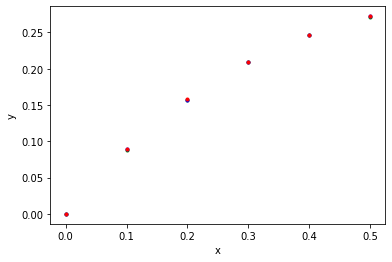

In [59]:
from matplotlib import pyplot as plt

plt.plot(xx, y_h, 'g.')
plt.plot(xx, y_h_2, 'b.')
plt.plot(xx, y_rev, 'r.')



plt.xlabel("x")
plt.ylabel("y")
plt.show()


5. Метод Рунге-Кутты 4-го порядка

In [60]:
xx_2 = [round(x, 2) for x in np.arange(0, 0.6, h_2)]
n_2 = len(xx_2)
Y_RK_2 = [0]*n_2
y_RK_2 = [0]*n
Y_RK_2[0] = y_a

Y_RK_2 = fun.Runge_Kut(Y_RK_2, xx_2, h_2)
for i in range(0, n_2, 2):
    y_RK_2[i//2] = Y_RK_2[i]

errs_RK_2 = [0]*n
for i in range(n):
    errs_RK_2[i] = np.abs(y_RK_2[i] - y_math[i] )

print("Решения, полученные методом Рунге-Кутты", y_RK_2)
print("Погрешность: ", errs_RK_2)


Решения, полученные методом Рунге-Кутты [0, 0.0889404120646352, 0.157677387266089, 0.20921728864481295, 0.24649311927953876, 0.27220160555376705]
Погрешность:  [0, 0.011059587935364809, 0.019535612733911023, 0.025756711355187034, 0.03017488072046126, 0.03322239444623293]


6. Экстраполяционный метод Адамса 4-го порядка

In [61]:
xx = [round(x, 2) for x in np.arange(4*h_2, 0.5+h_2, h_2)]
y_Ad_ex = [0]*len(xx)
for i in range(5):
    y_Ad_ex[i] = Y_RK_2[i+4]
y_Ad_ex = fun.Adams_ex(y_Ad_ex, xx, h_2)


7. Интерполяционный метод Адамса 4-го порядка

In [62]:
xx = [round(x, 2) for x in np.arange(4*h_2, 0.5+h_2, h_2)]
y_Ad_in = [0]*len(xx)
for i in range(4):
    y_Ad_in[i] = Y_RK_2[i+4]
y_Ad_in = fun.Adams_in(y_Ad_ex, y_Ad_in, xx, h_2)


In [63]:
y_math_2 = [0.167095, 0.19646, 0.22166, 0.243084, 0.261105, 0.276075, 0.288327]

errs1 = [0]*len(xx)
errs2 = [0]*len(xx)

for i in range(len(xx)):
    errs1[i] = y_math_2[i] - y_Ad_ex[i]
    errs2[i] = y_math_2[i] - y_Ad_in[i]

data = [y_Ad_ex, errs1, y_Ad_in, errs2]
indexes = [
    "y_AD_ex",
    "y_math - y_AD_ex",
    "y_AD_in",
    "y_math - y_AD_in"
]
df = pd.DataFrame(data, index= indexes, columns=xx).T
df.columns.name = "$x$"
df


$x$,y_AD_ex,y_math - y_AD_ex,y_AD_in,y_math - y_AD_in
0.20,0.157677,0.009418,0.157677,0.009418
0.25,0.185409,0.011051,0.185409,0.011051
0.30,0.209217,0.012443,0.209217,0.012443
0.35,0.229463,0.013621,0.229463,0.013621
0.40,0.246493,0.014612,0.246493,0.014612
0.45,0.260635,0.015440,0.260636,0.015439
0.50,0.272201,0.016126,0.272202,0.016125
